# Traffic assignment

##### Laurent Pétré & Ilan Renous

We are going to integrate the density of car traffic under precise conditions. To do so, we are going to use a derivate of Euler's method. Let's get started!

In [1]:
# We import the libraries we will need
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline
from JSAnimation.IPython_display import display_animation
import matplotlib.animation as anim

## Traffic density evolution equations 

### Implementation

In [2]:
def speed(rho, rhomax = 250.0, Vmax = 22.22):
    return Vmax*(1-rho/rhomax)

def flux(rho, rhomax = 250.0, Vmax = 22.22):
    return speed(rho, rhomax, Vmax)*rho

## Discretisation of the problem

In [3]:
def solve(u_t0, u_x0, f, dt, dx, nt, callback):
    u = u_t0.copy()
    Fn = f(u_t0)

    for n in range(1, nt):
        un = u.copy()
        u[1:] = un[1:]-dt/dx*(Fn[1:]-Fn[0:-1]) 
        u[0] = u_x0(n)
        Fn = f(u)
        callback(n, u)

## Solve !

In [4]:
L = 11000.0

nx = 51
dx = L/(nx-1)

x = npy.linspace(0, L, nx)

dt = 3.6

def save_data(n, u, u_f):
    u_f[n, :] = u

def set_plot(i, line, x, u):
    line.set_data(x, u[i, :])

### First set of initial conditions

In [5]:
t_to_sim = 360
nt = int(t_to_sim/dt)

rho0 = npy.ones(nx)*10.0
rho0[10:20] = 50.0

rho = npy.empty((nt, 51))
rho[0, :] = rho0

solve(rho0, lambda n: 10.0, flux, dt, dx, nt, \
      lambda n, u: save_data(n, u, rho))

print(speed(npy.mean(rho[49, :])))
print(speed(npy.amax(rho[99, :])))

20.634102285
18.7747620644



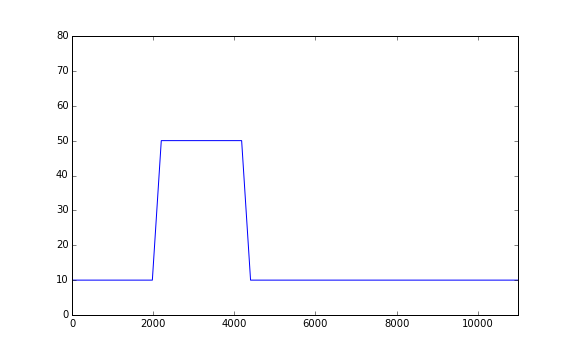
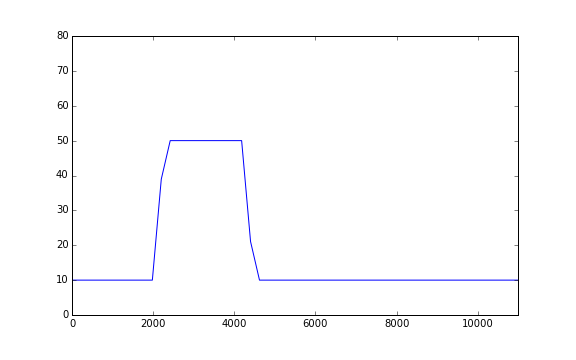
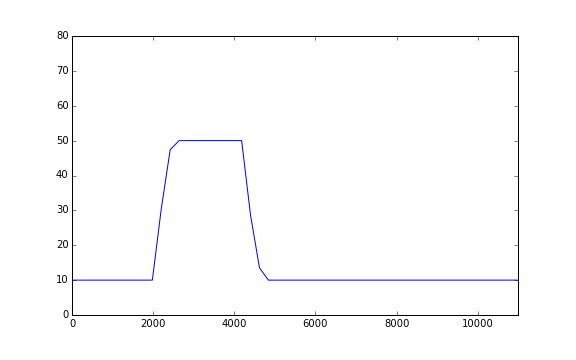
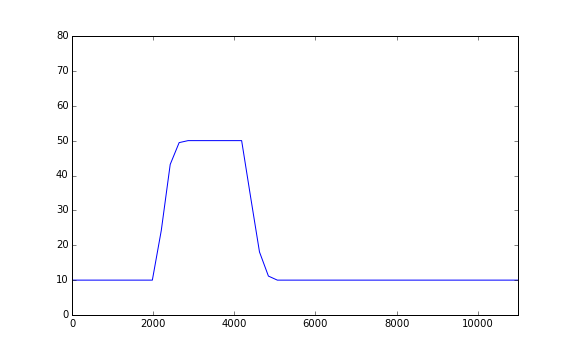
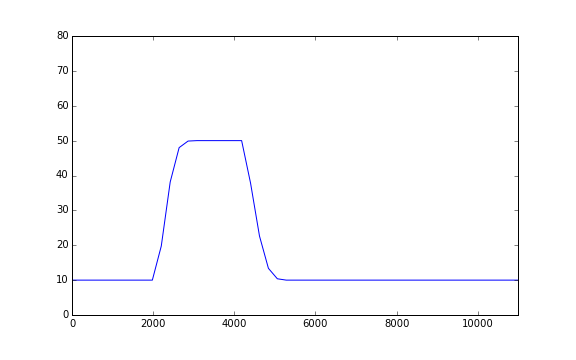
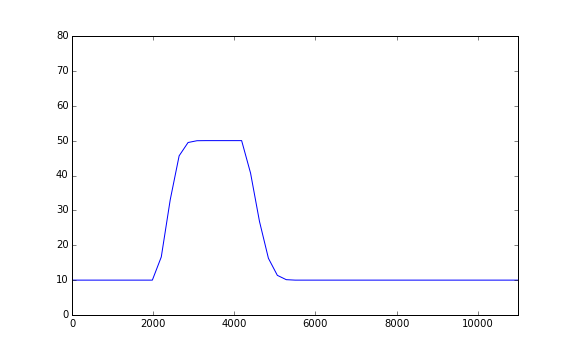
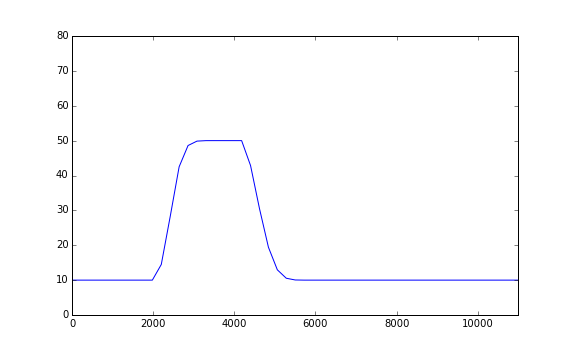
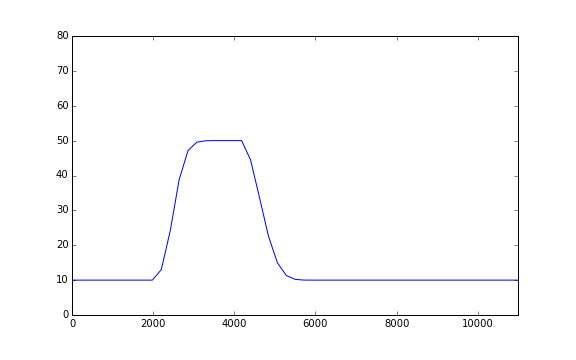
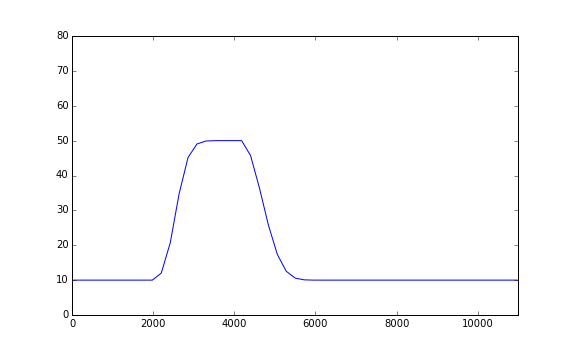
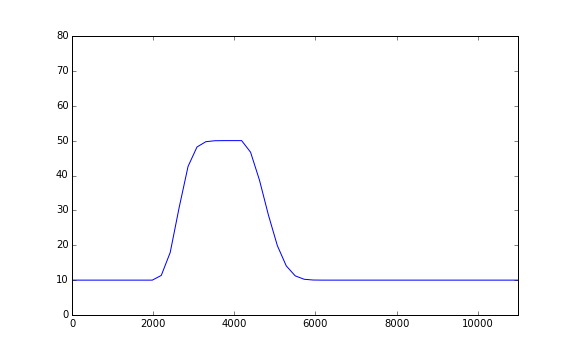
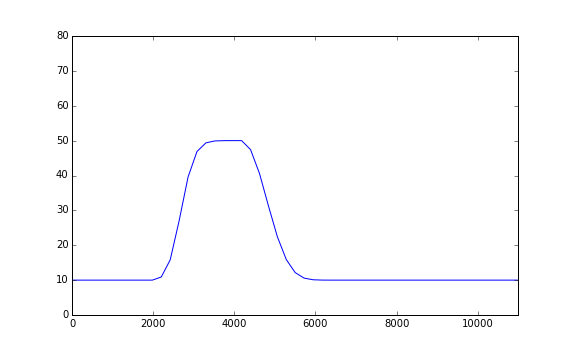
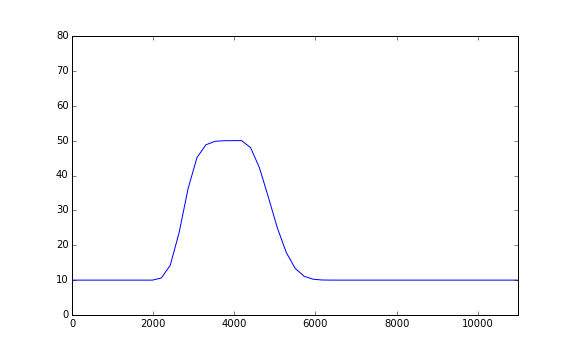
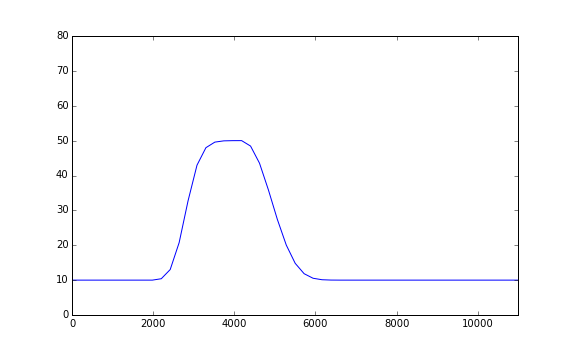
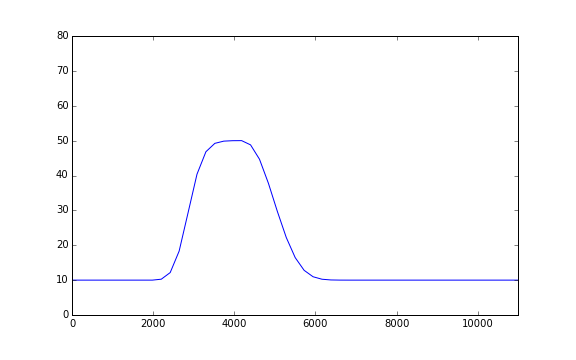
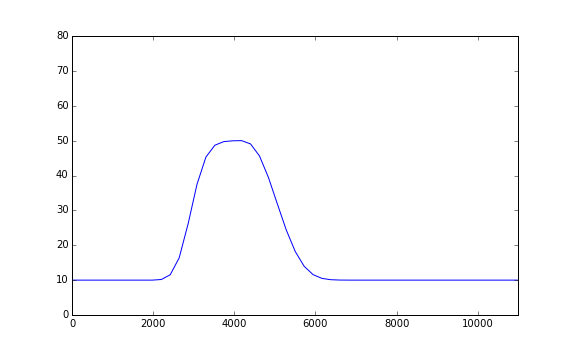
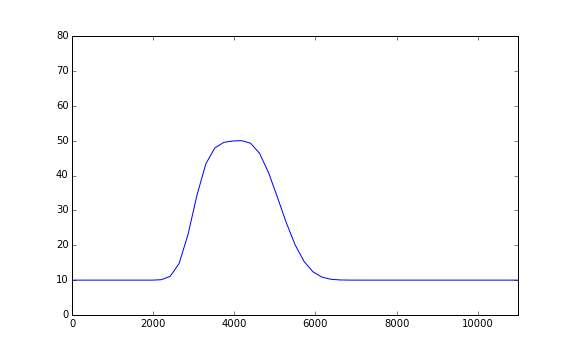
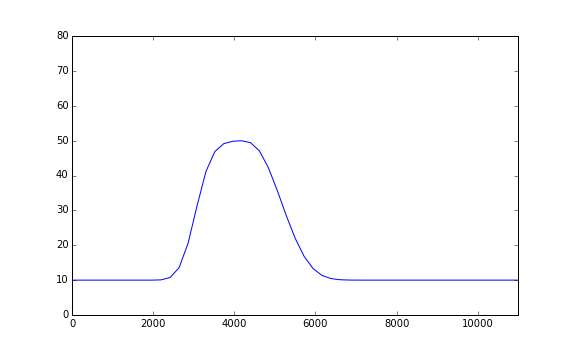
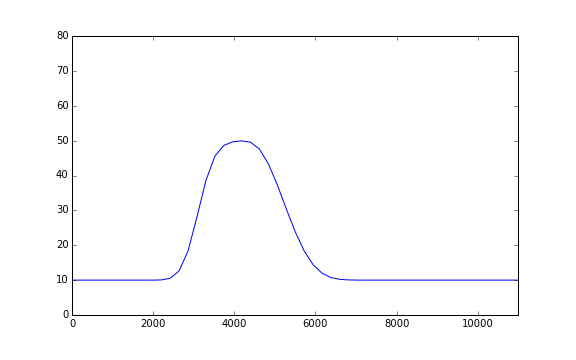
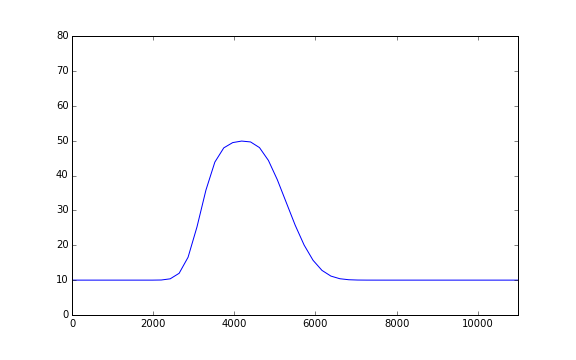
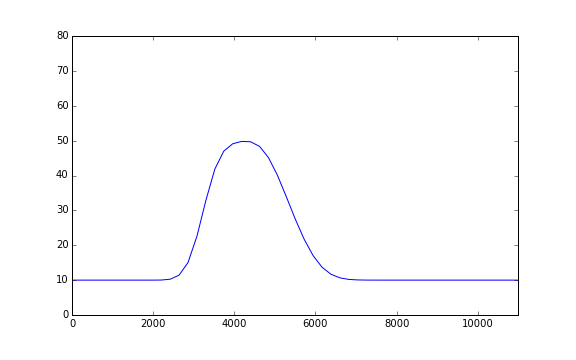
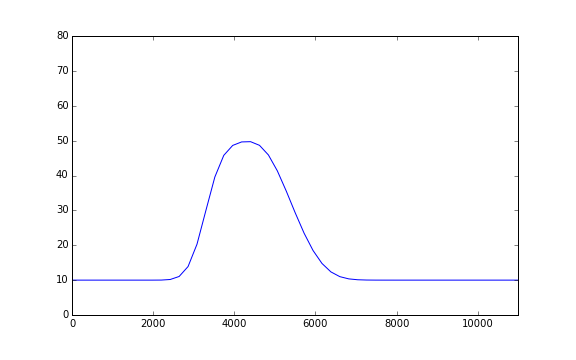
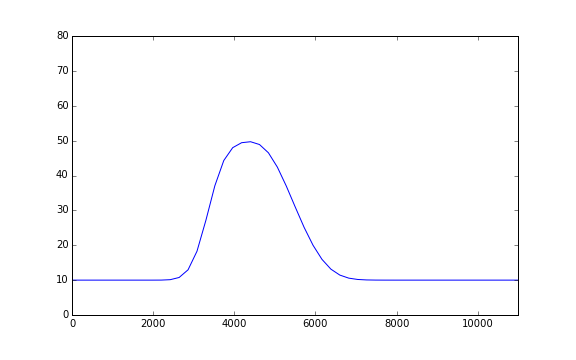
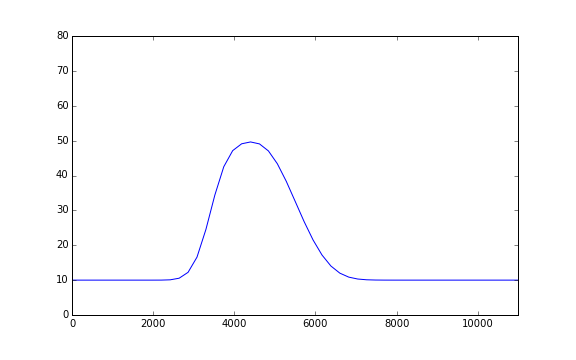
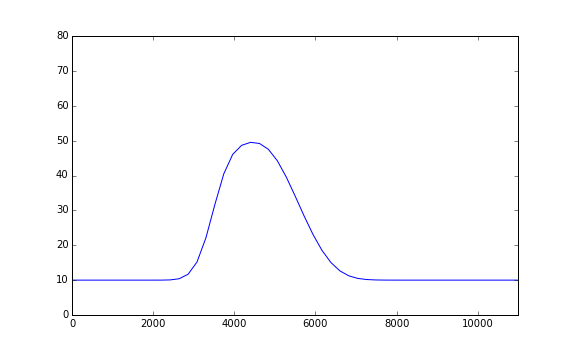
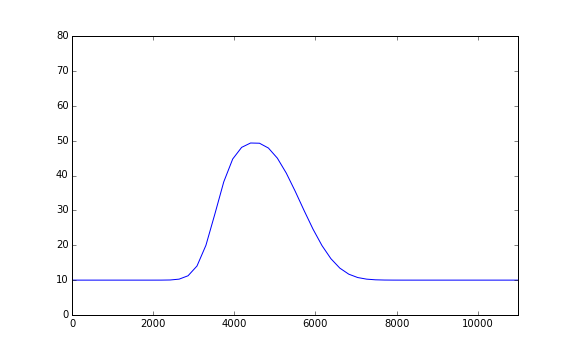
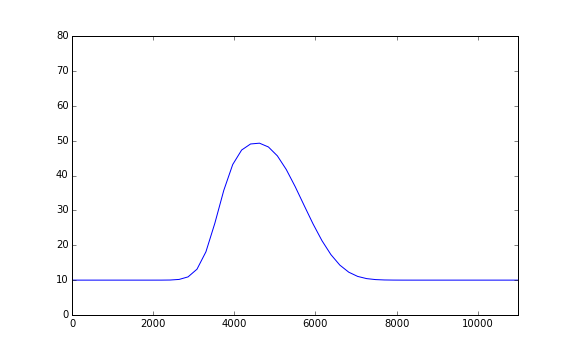
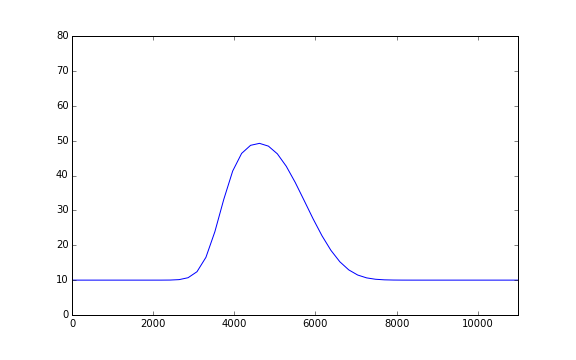
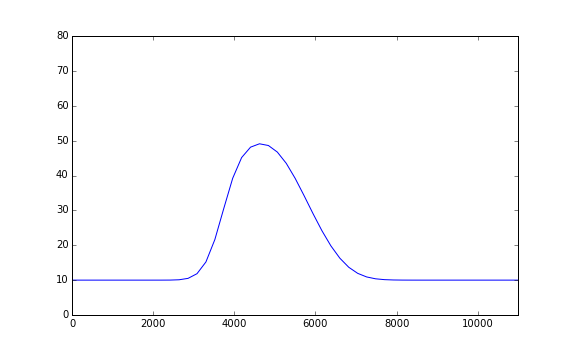
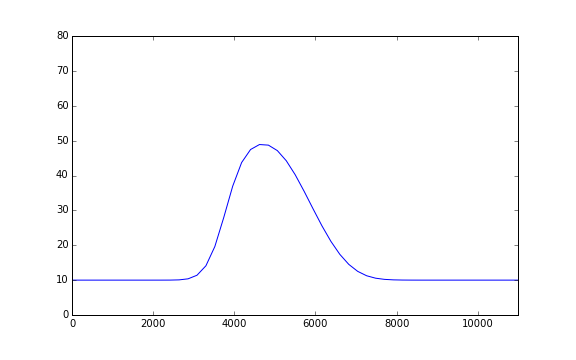
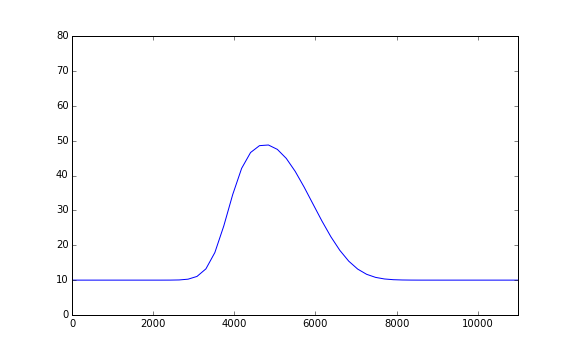
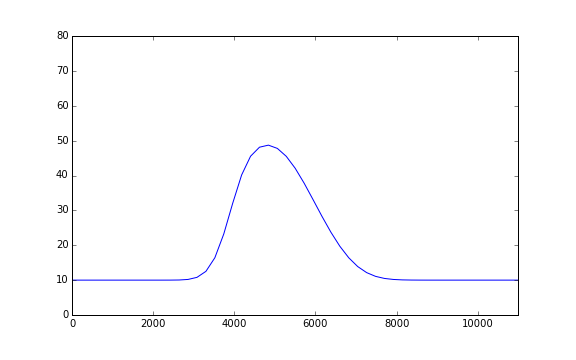
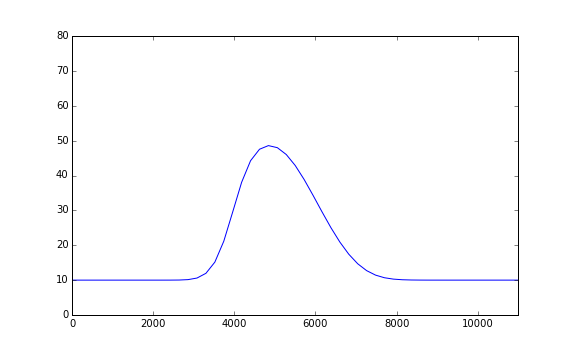
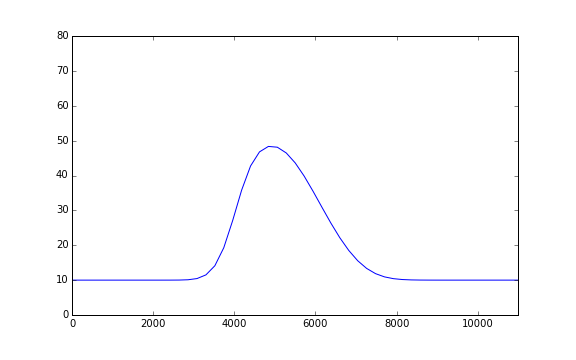
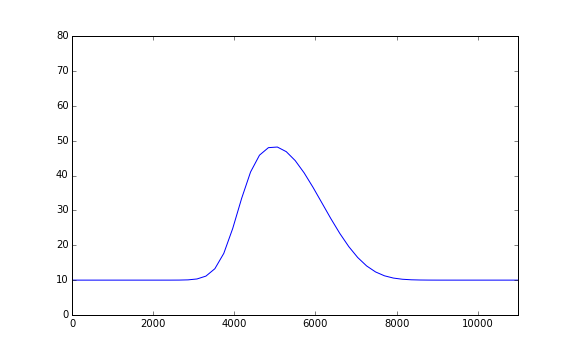
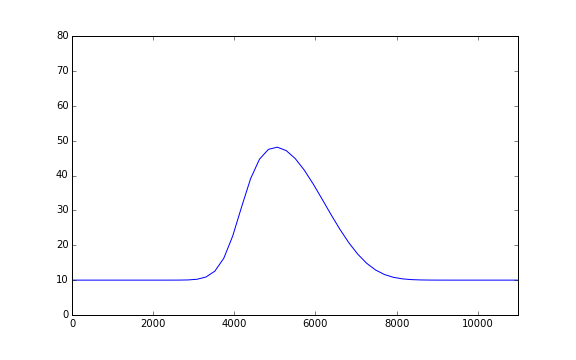
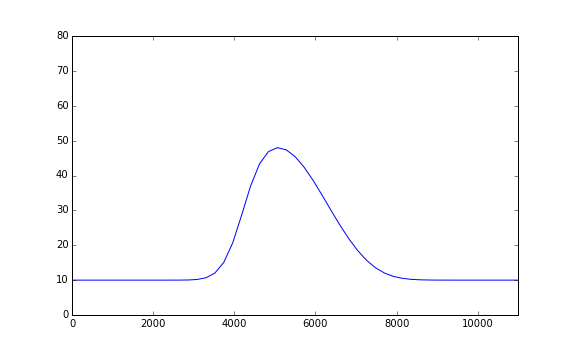
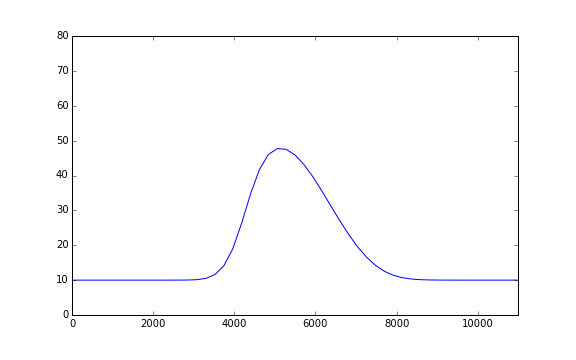
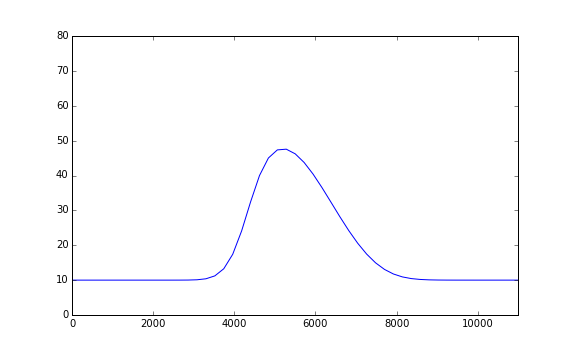
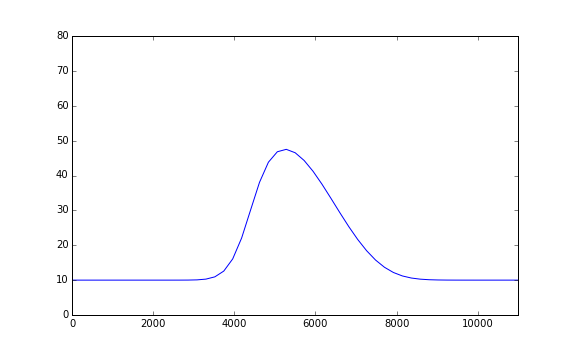
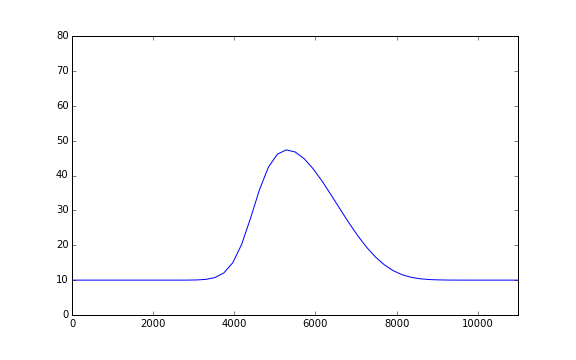
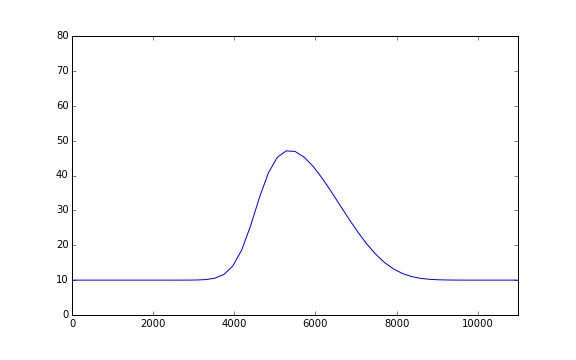
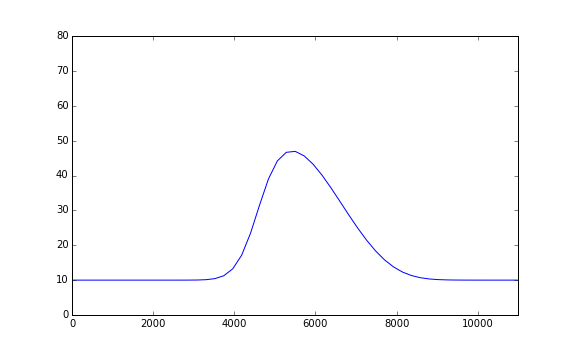
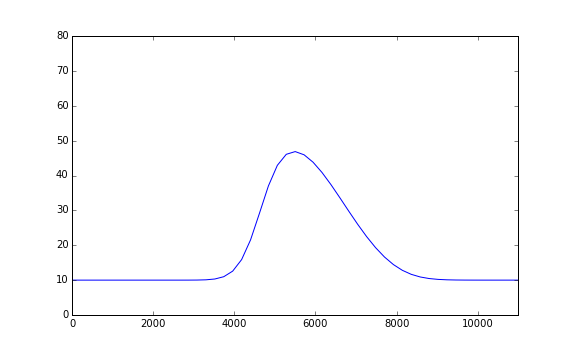
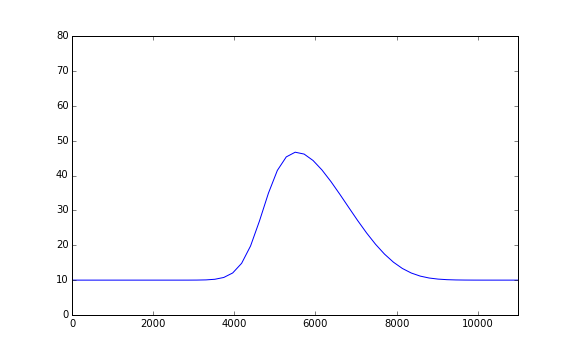
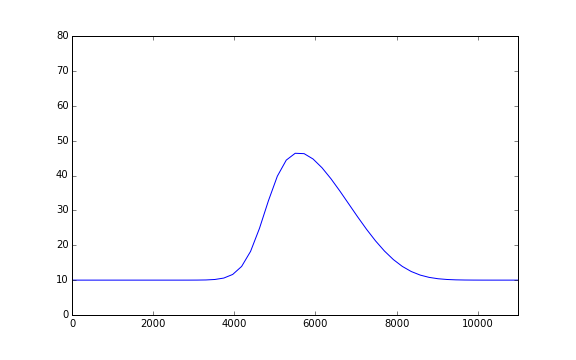
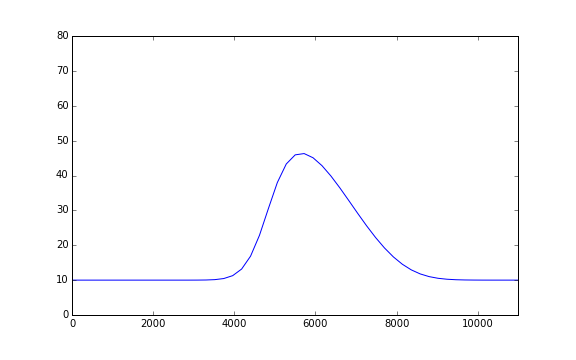
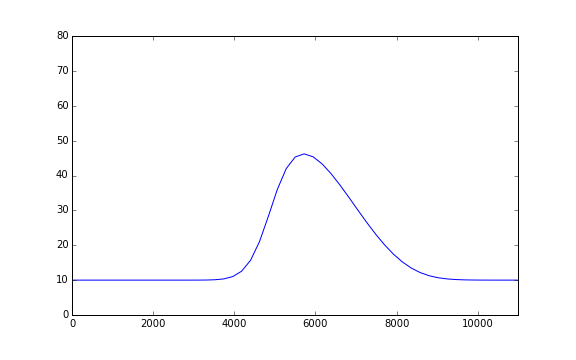
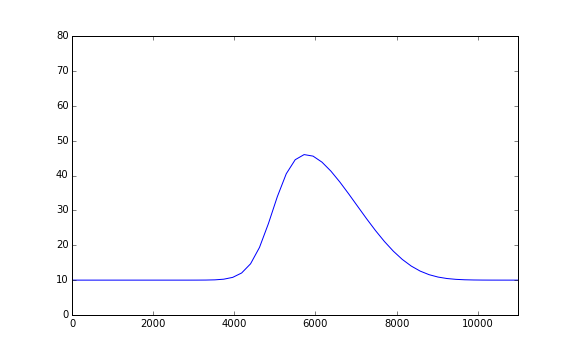
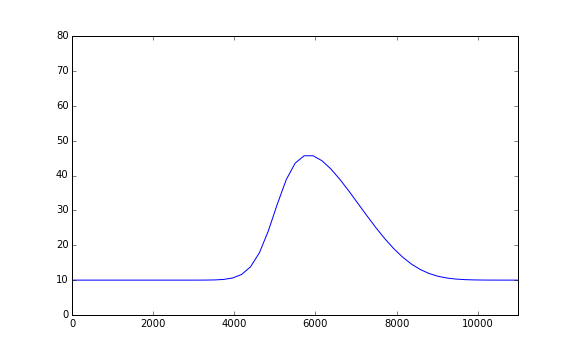
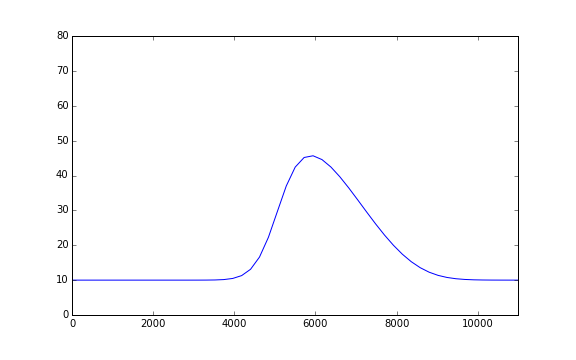
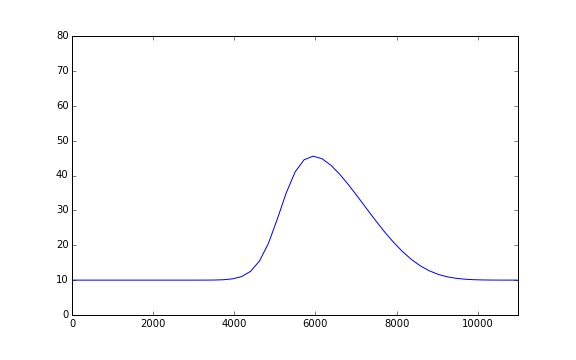
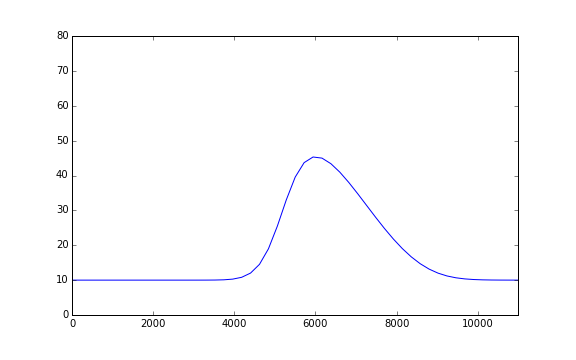
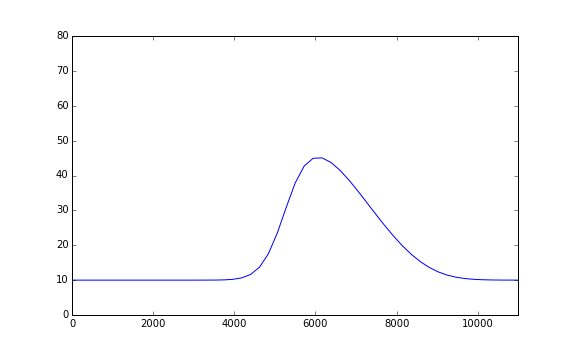
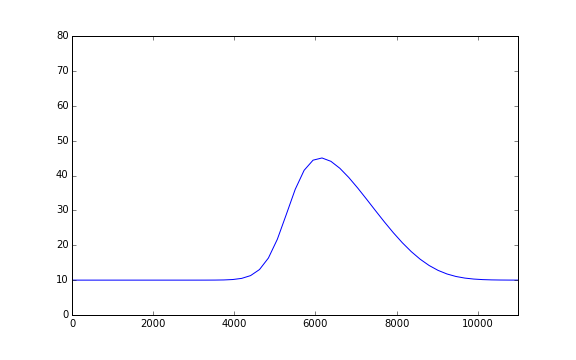
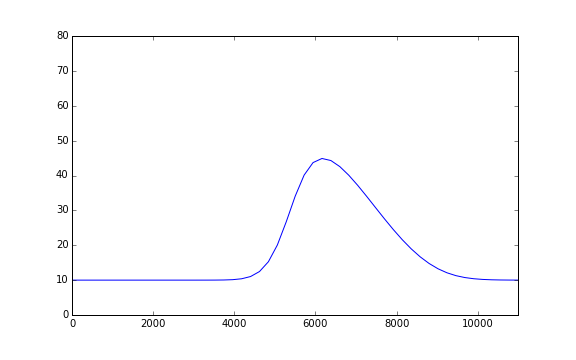
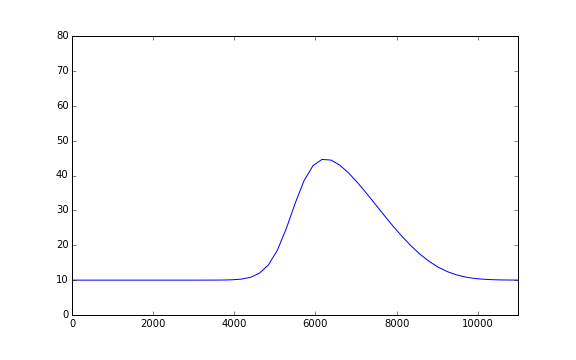
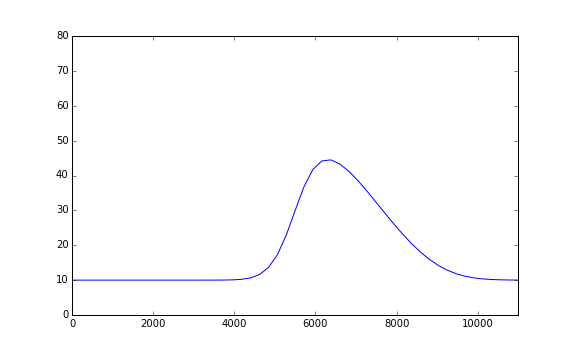
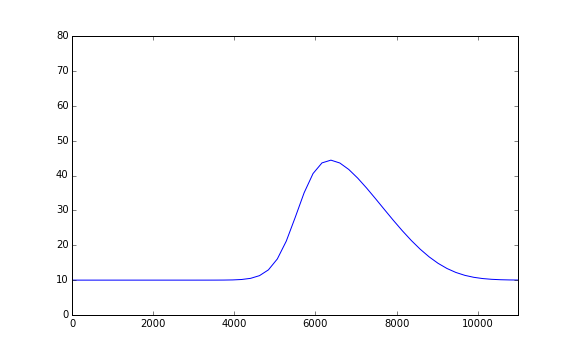
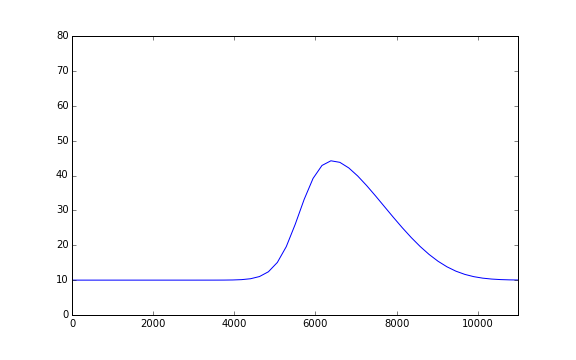
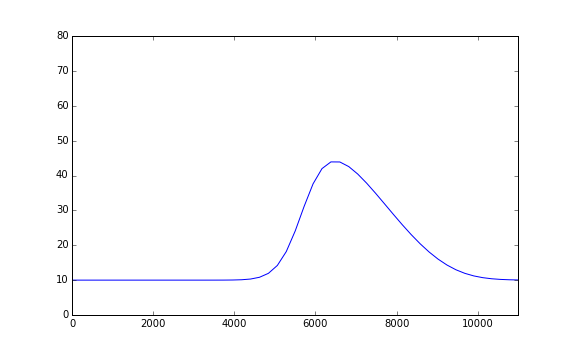
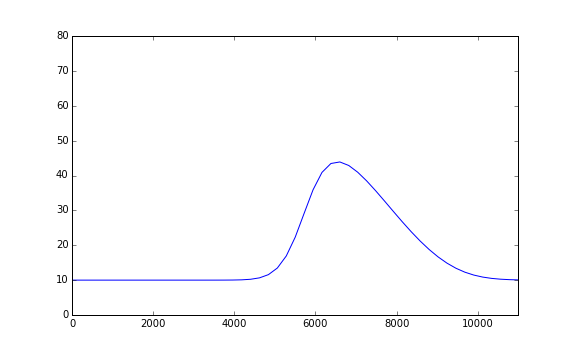
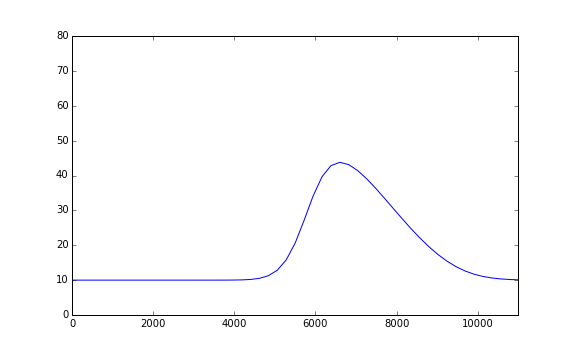
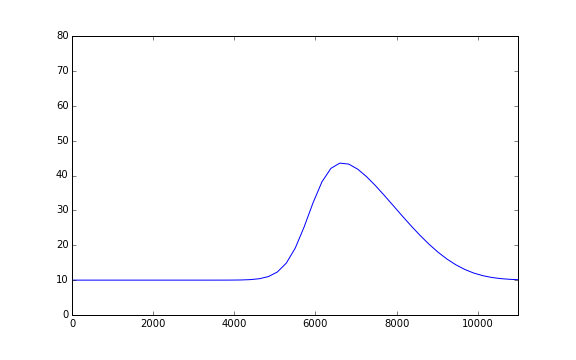
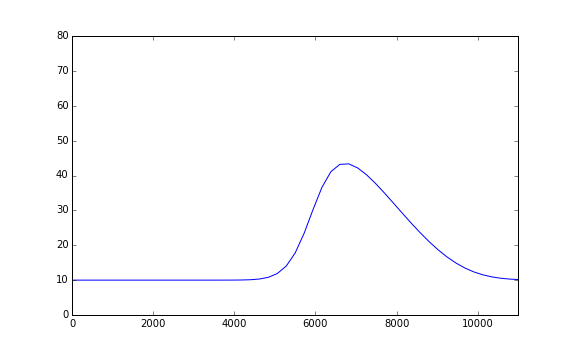
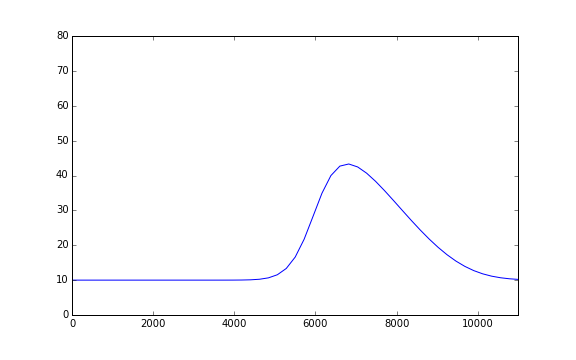
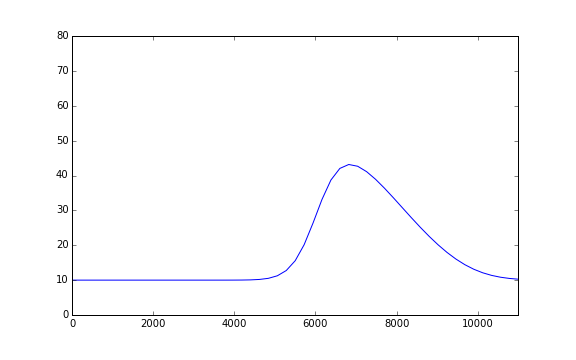
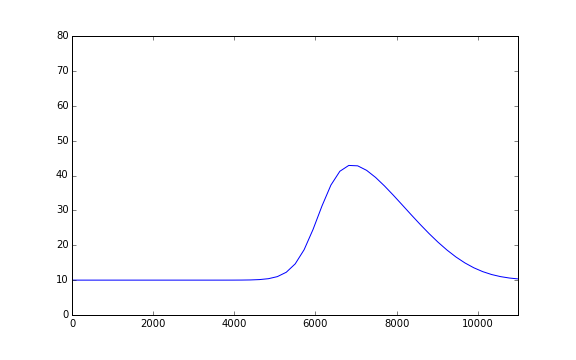
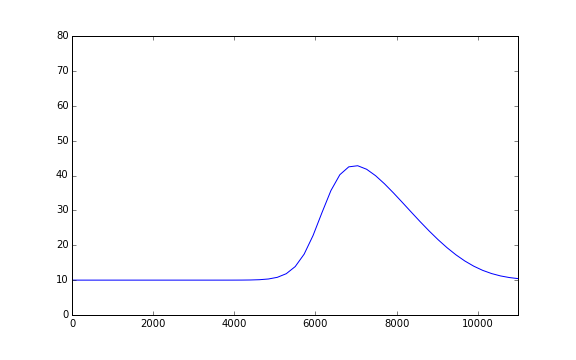
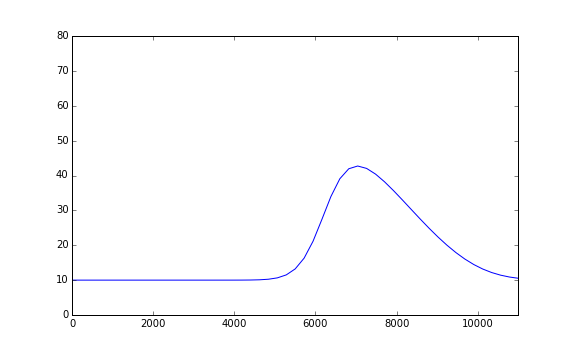
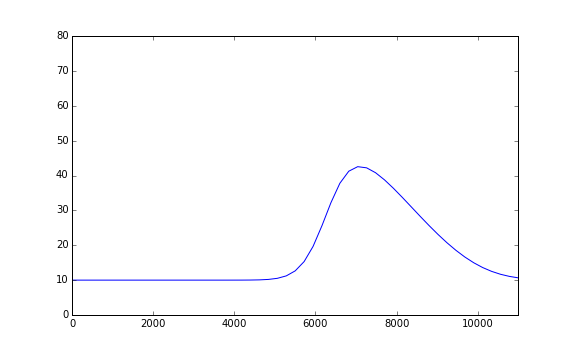
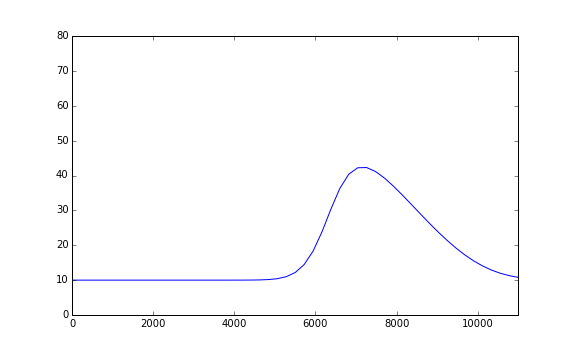
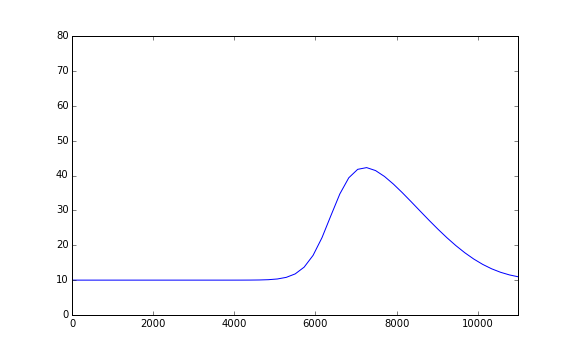
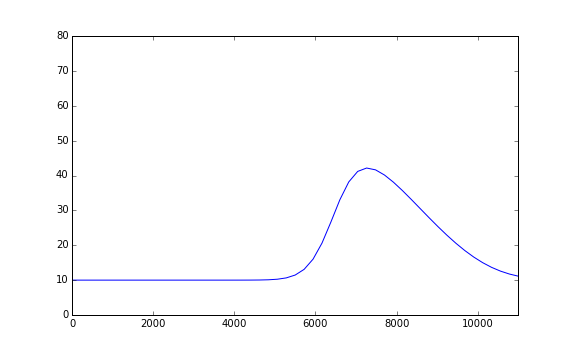
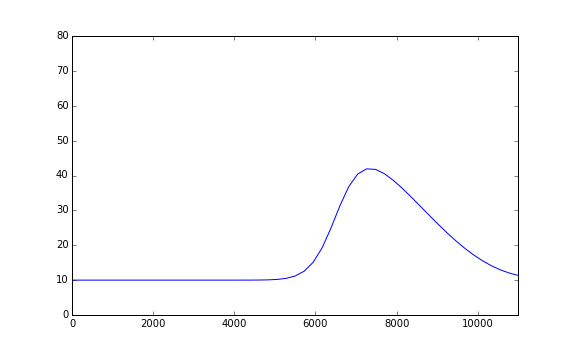
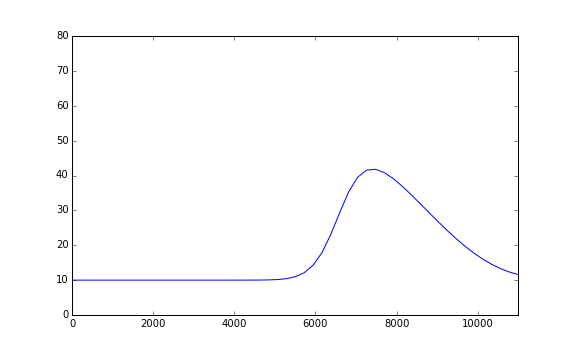
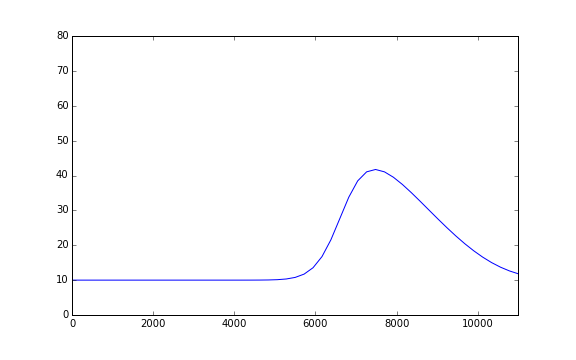
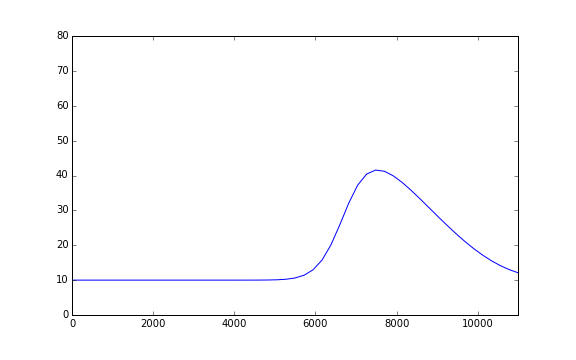
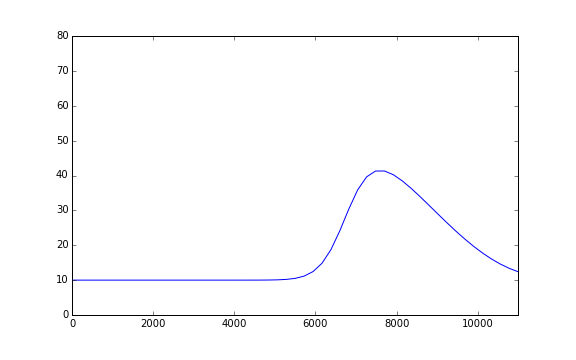
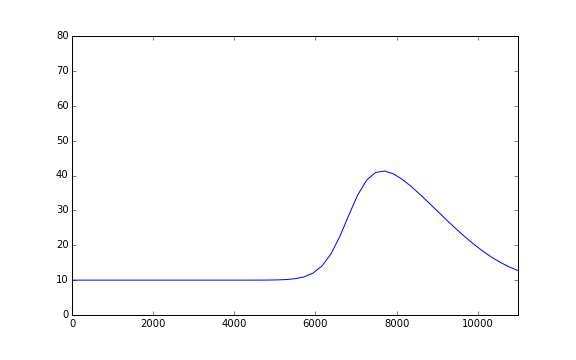
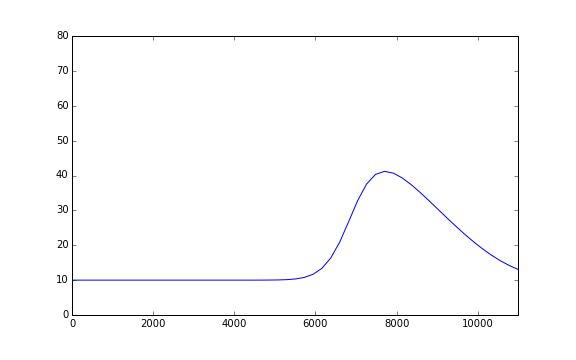
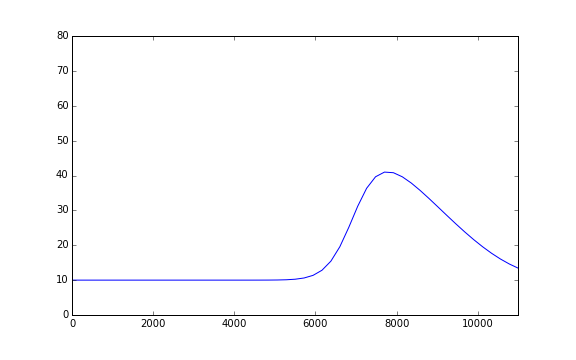
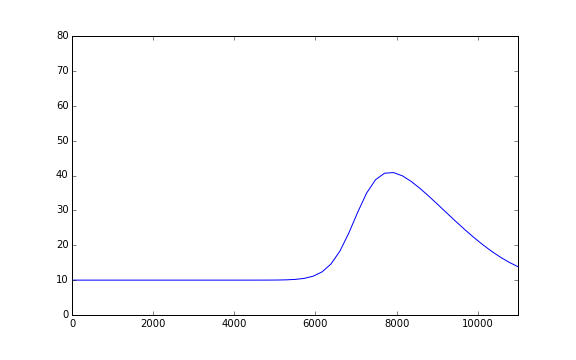
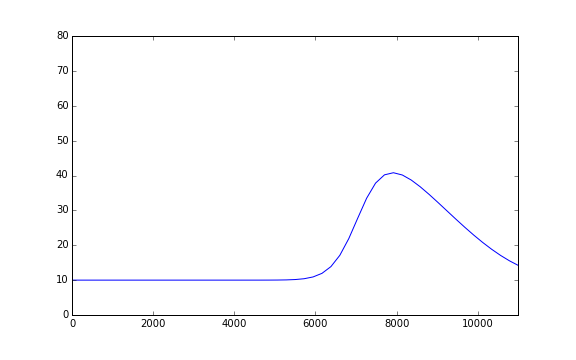
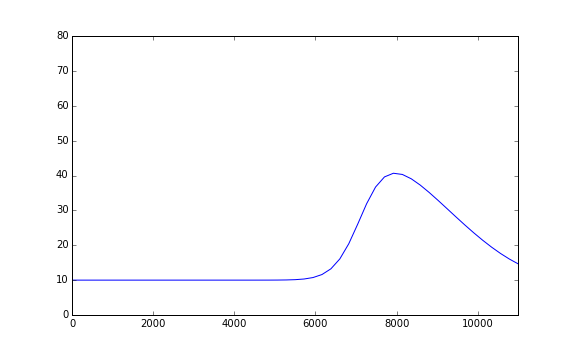
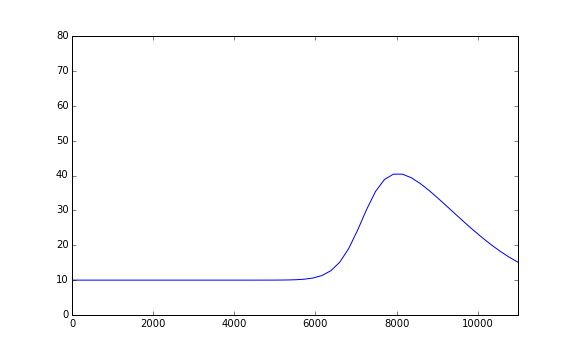
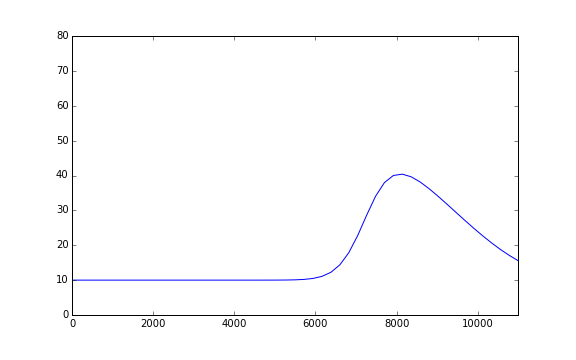
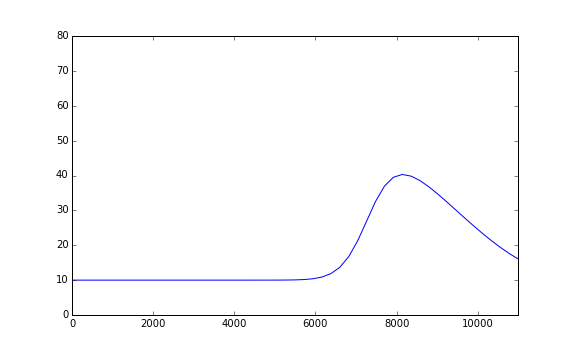
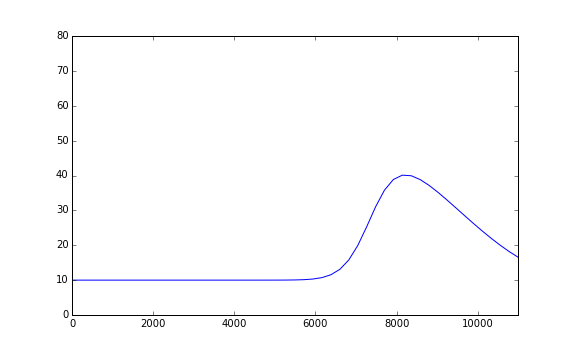
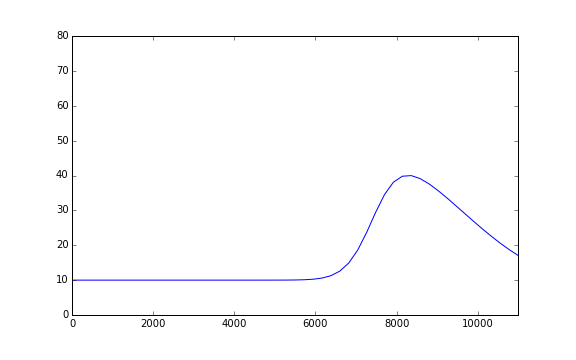
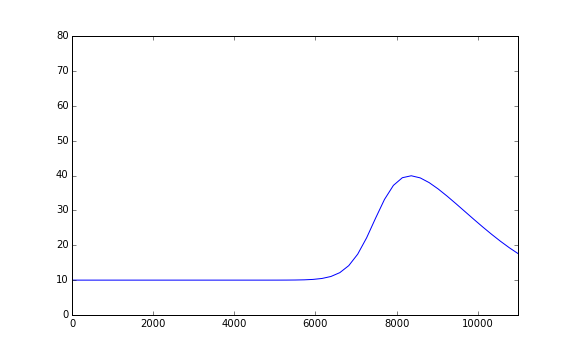
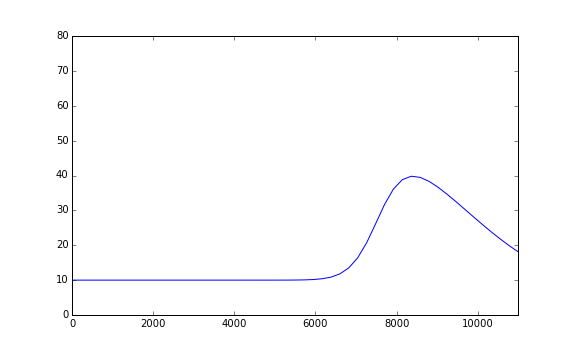
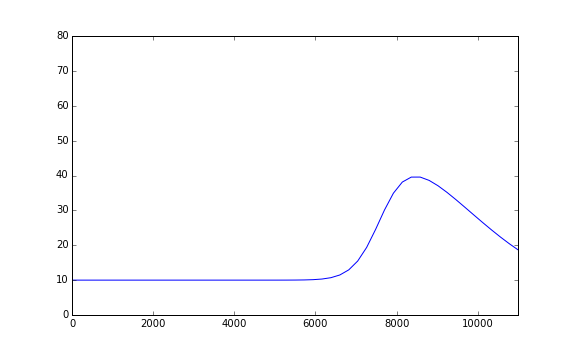
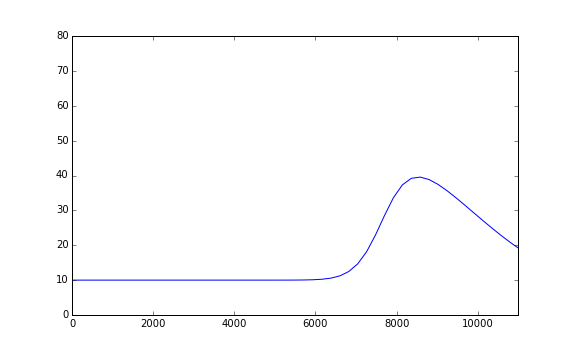
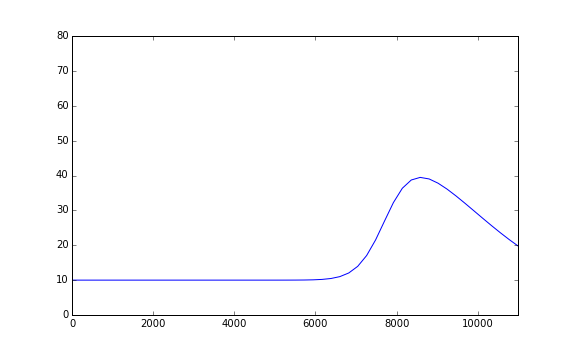
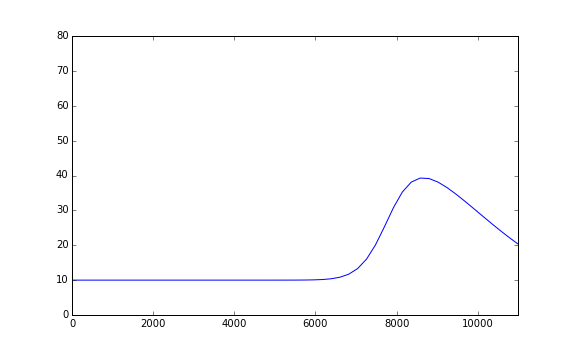
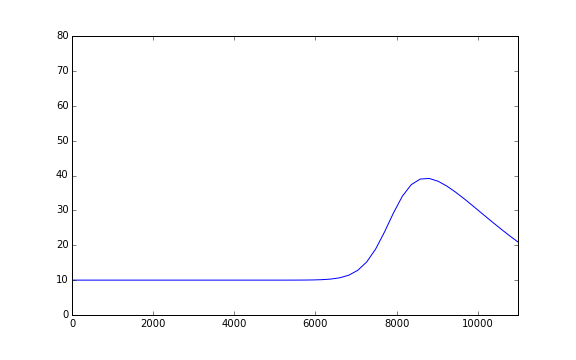
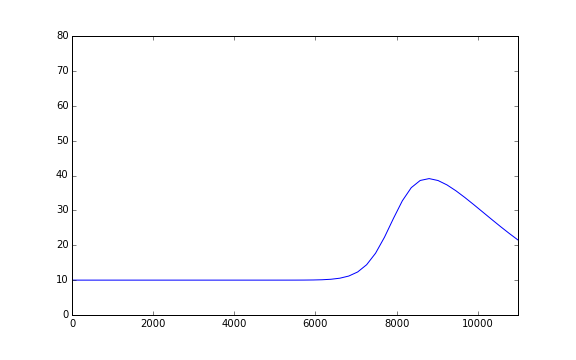
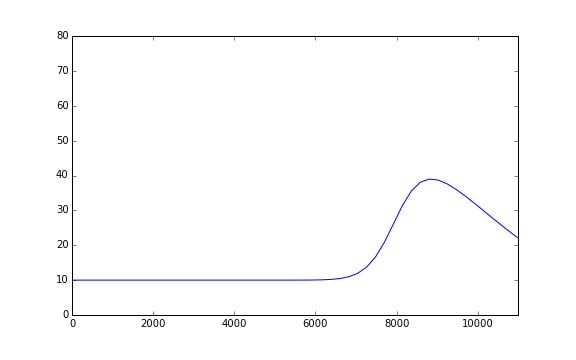
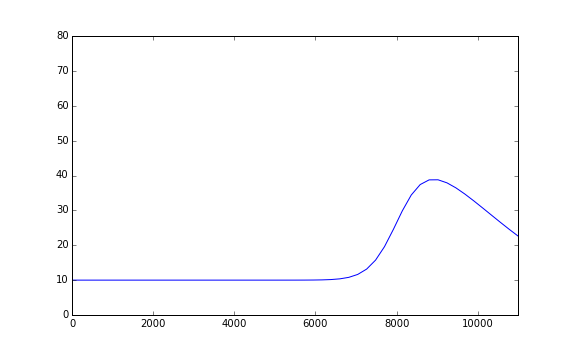
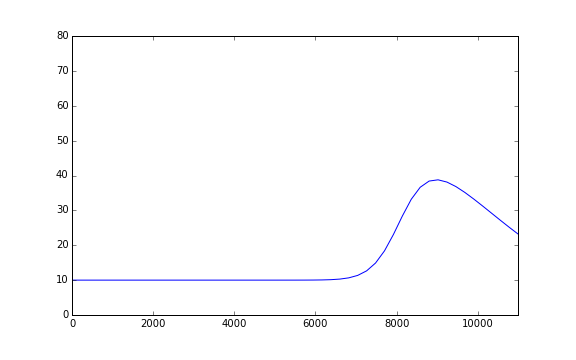

In [6]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(xlim=(0,11000), ylim=(0,80))
line = ax.plot([], [])[0]

anim.FuncAnimation(fig, lambda i: set_plot(i, line, x, rho),
                        frames=nt, interval=80)

### Second set of inital conditions

In [8]:
t_to_sim = 180
nt = int(t_to_sim/dt)

rho0 = npy.ones(nx)*20.0
rho0[10:20] = 50.0

rho = npy.empty((nt, 51))
rho[0, :] = rho0

solve(rho0, lambda n: 20.0, lambda u: flux(u, Vmax = 37.78), \
      dt, dx, nt, lambda n, u: save_data(n, u, rho))

print(speed(npy.mean(rho[49, :]),Vmax=37.78))
print(speed(npy.amax(rho[49, :]),Vmax=37.78))

33.87248308
30.948046861



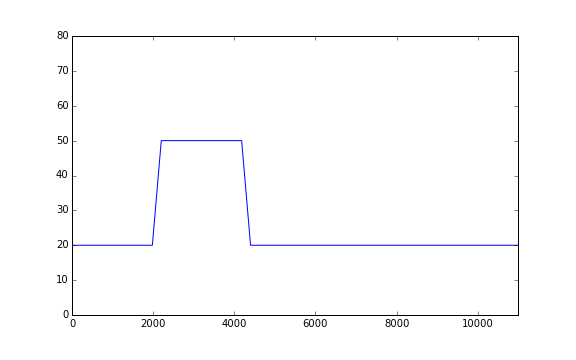
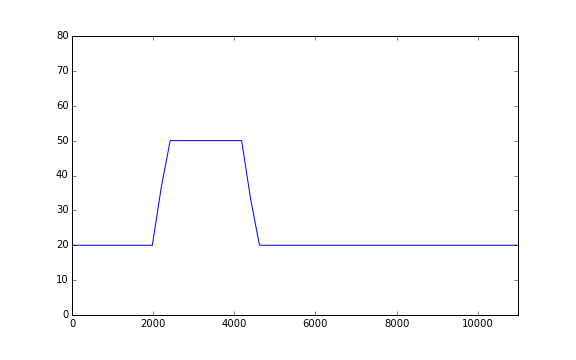
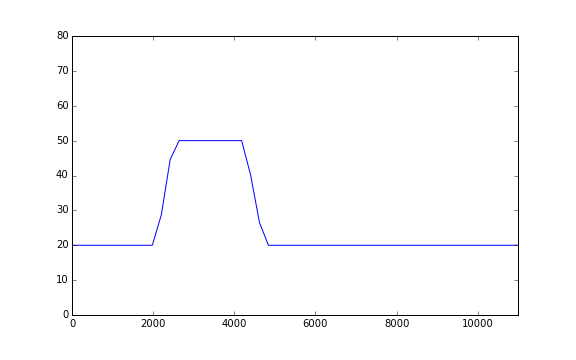
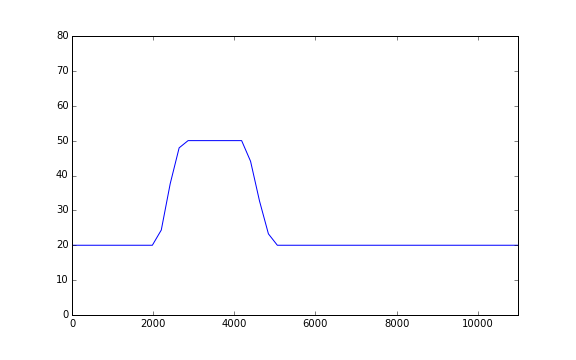
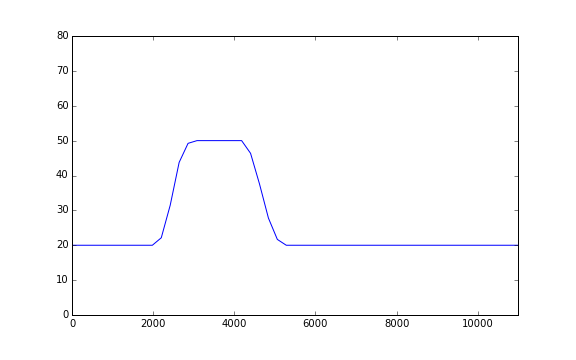
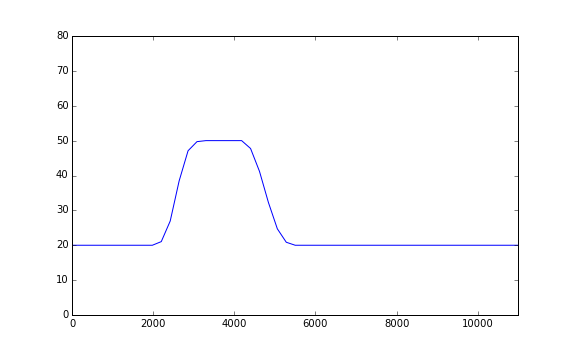
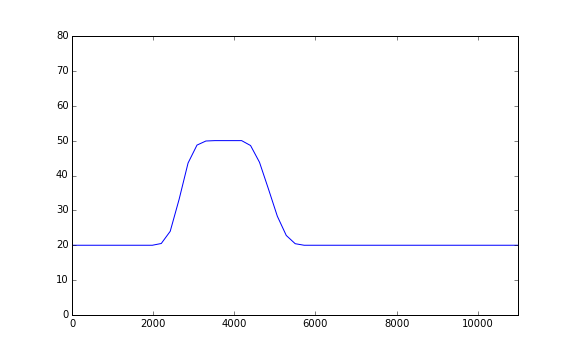
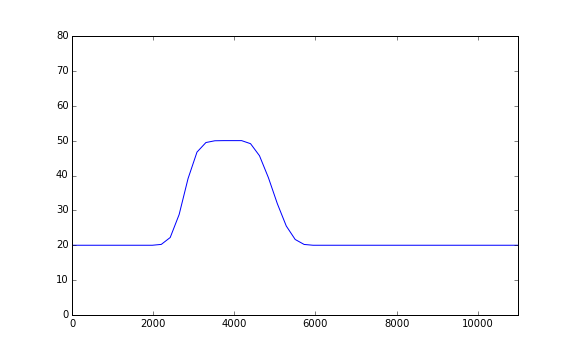
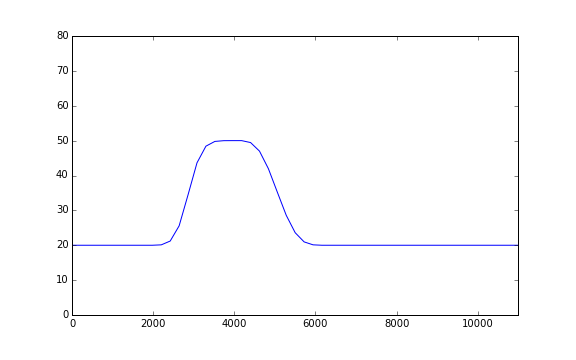
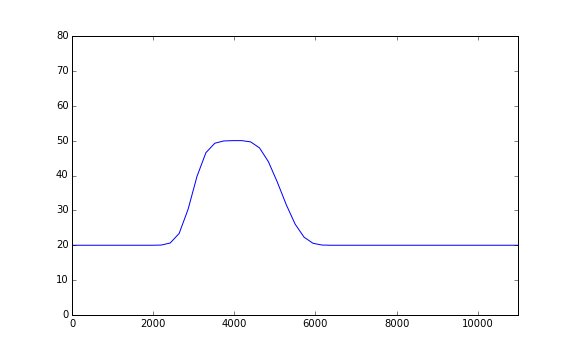
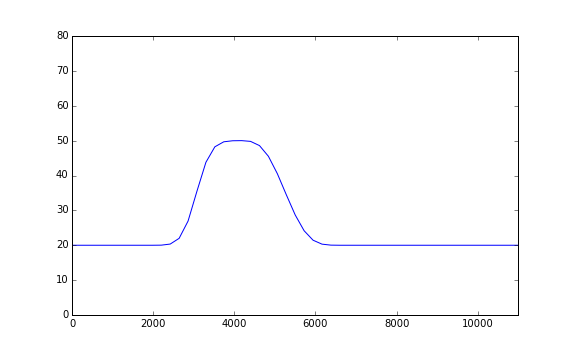
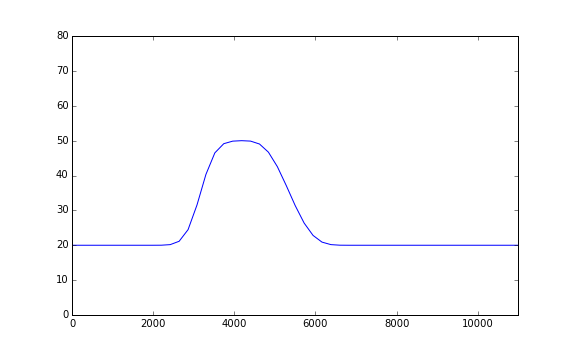
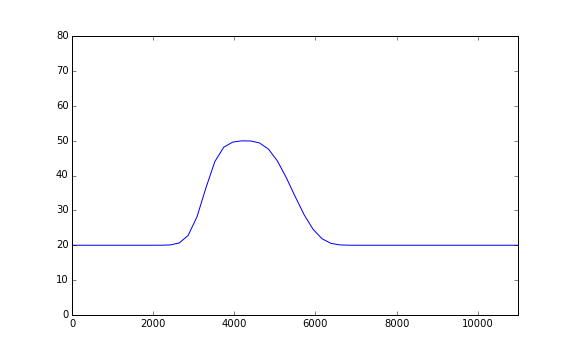
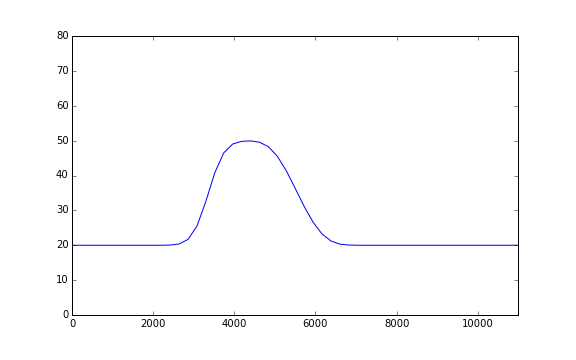
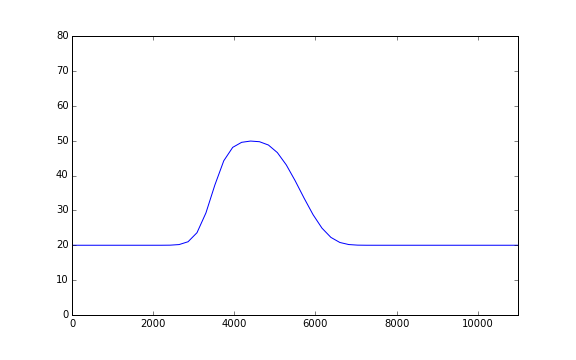
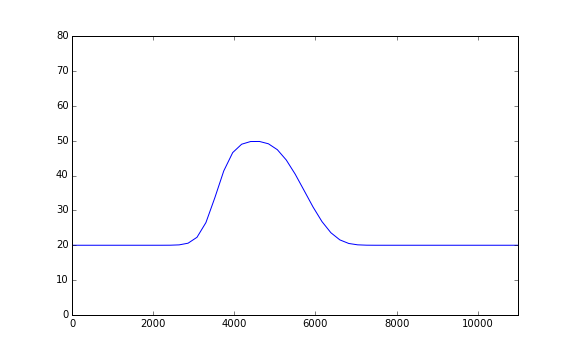
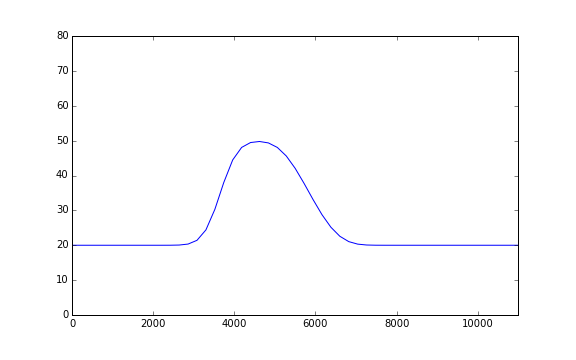
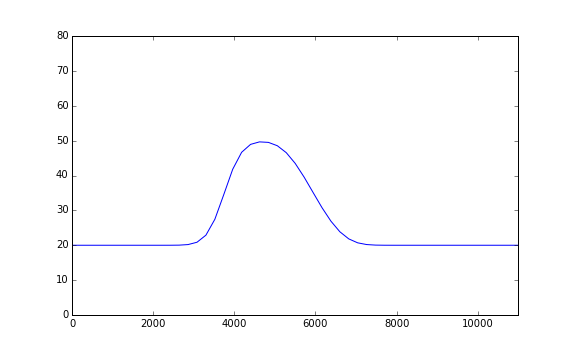
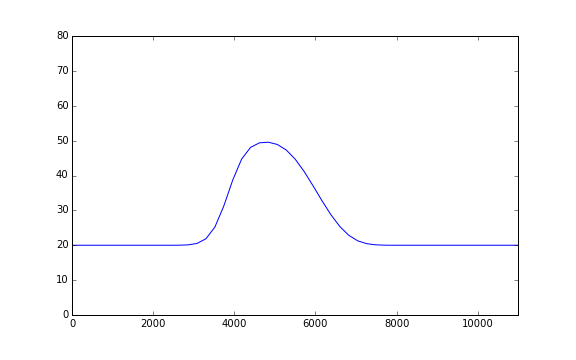
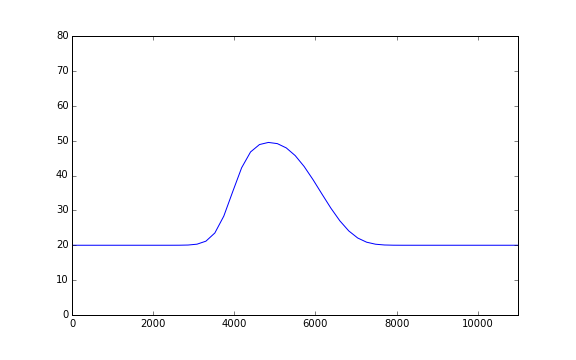
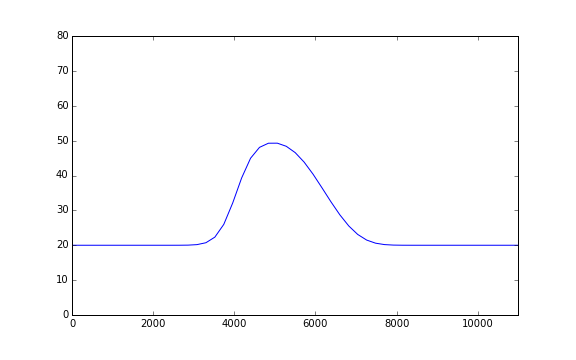
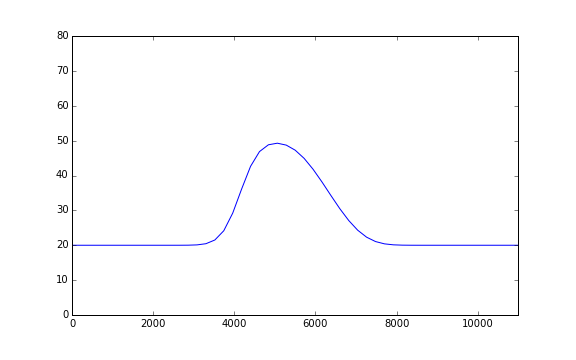
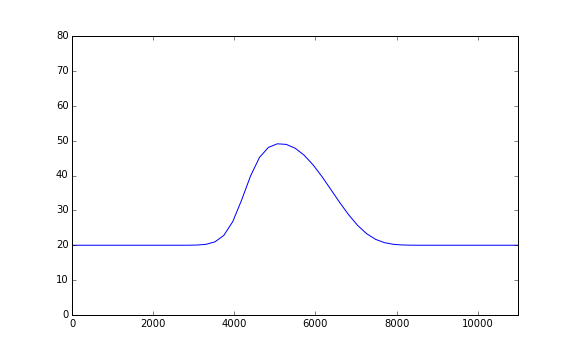
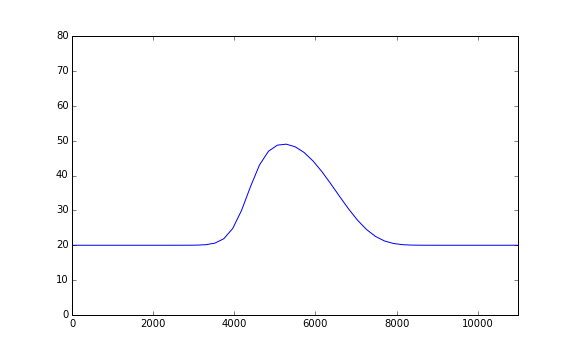
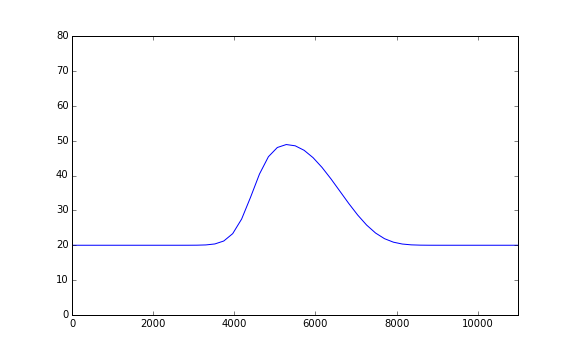
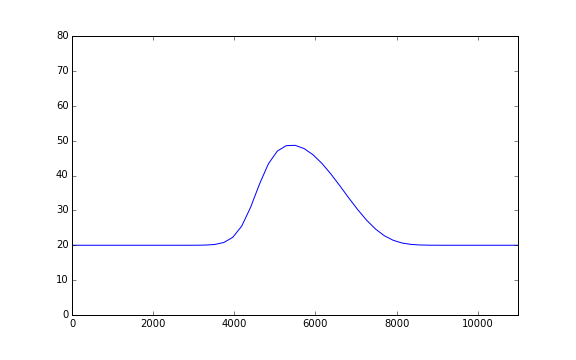
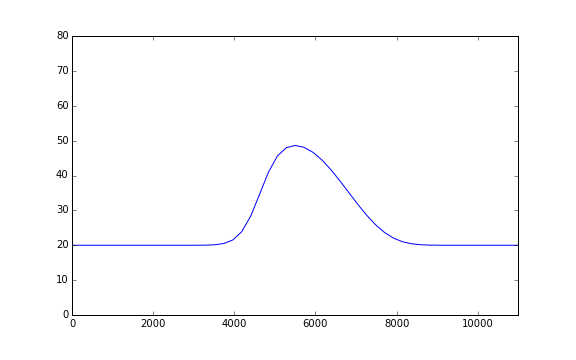
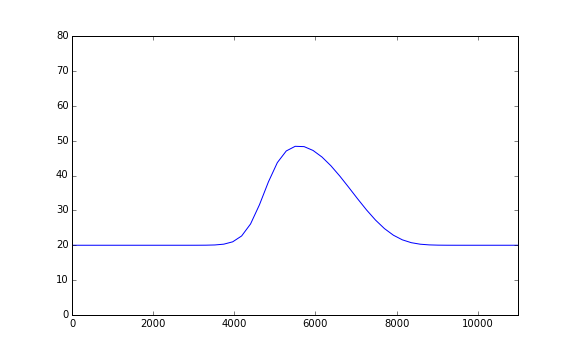
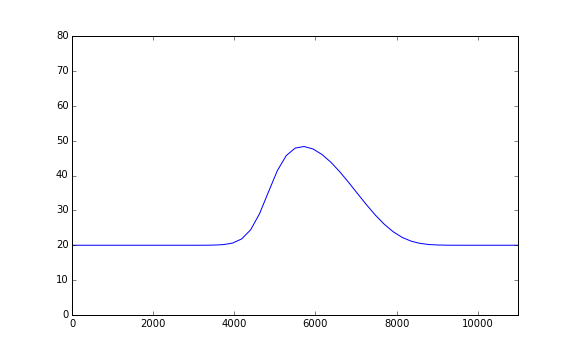
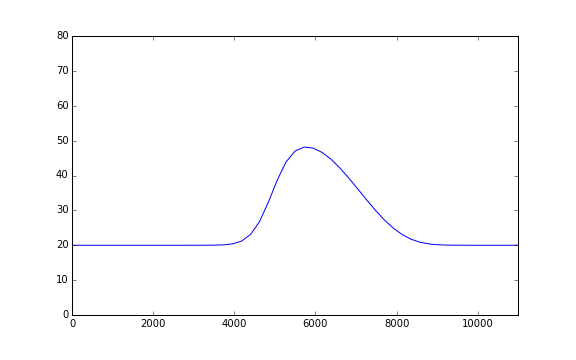
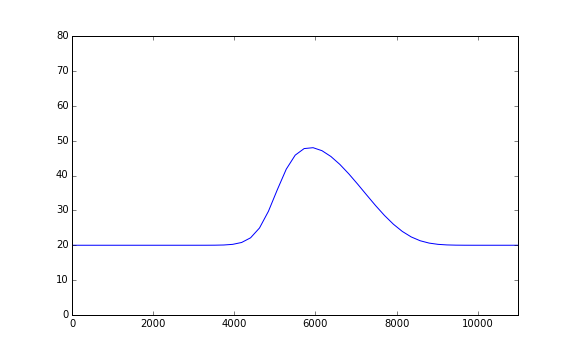
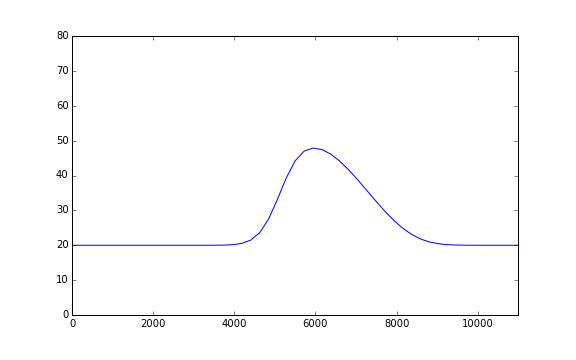
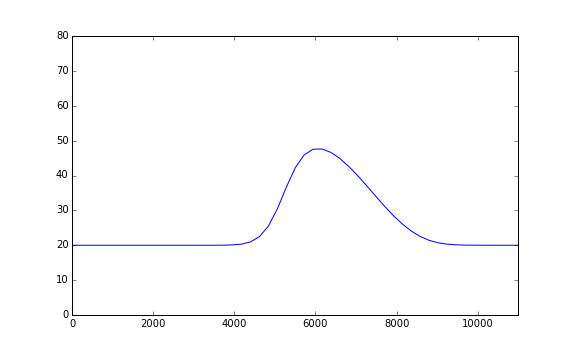
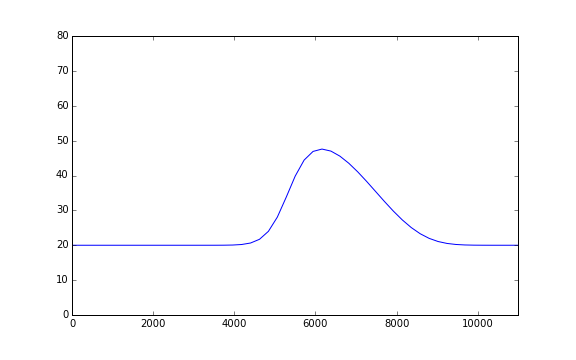
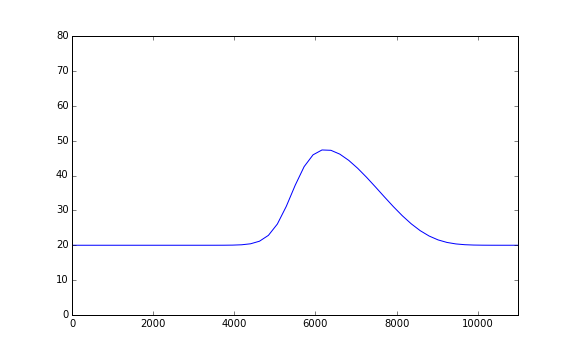
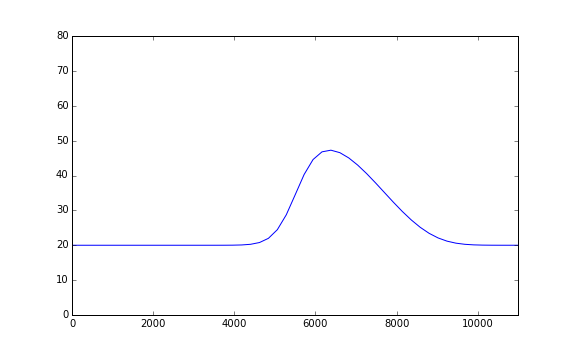
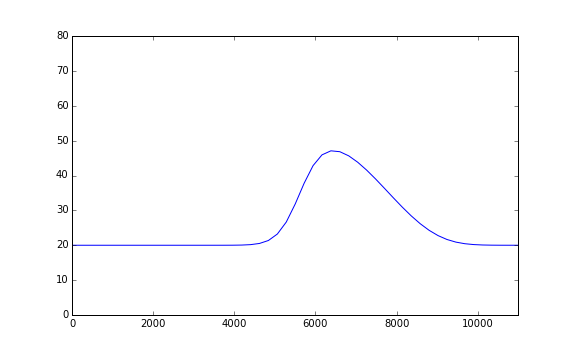
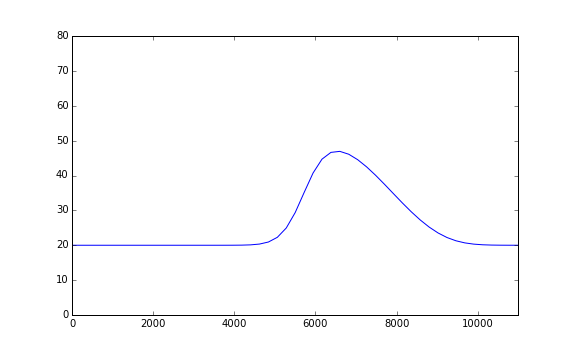
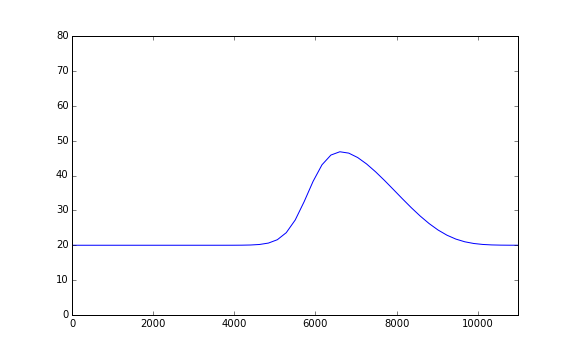
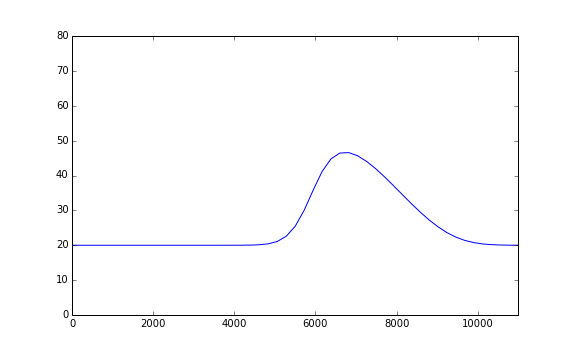
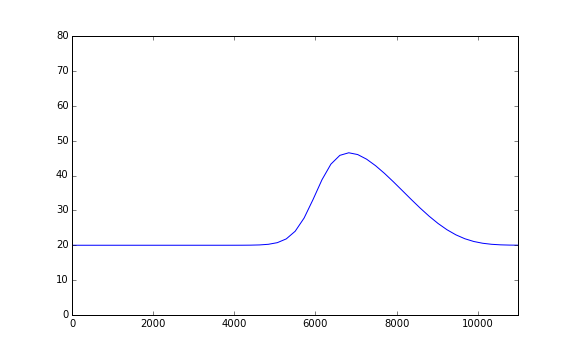
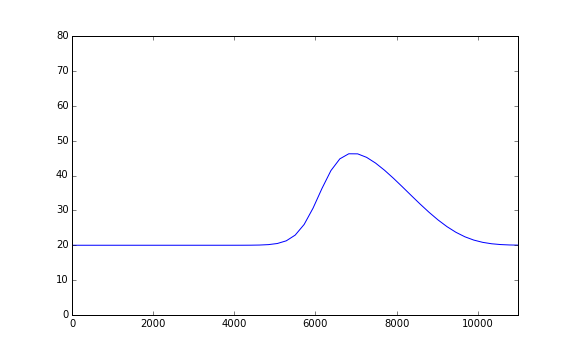
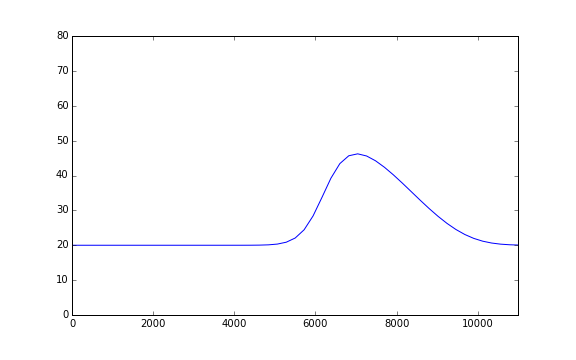
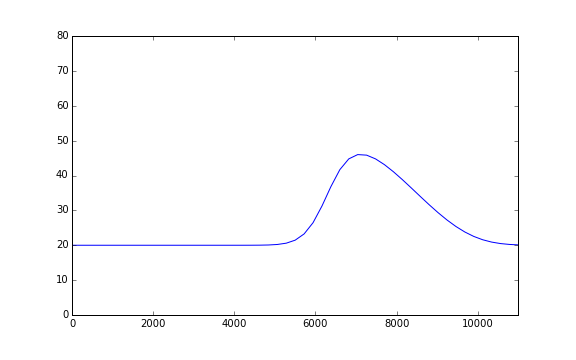
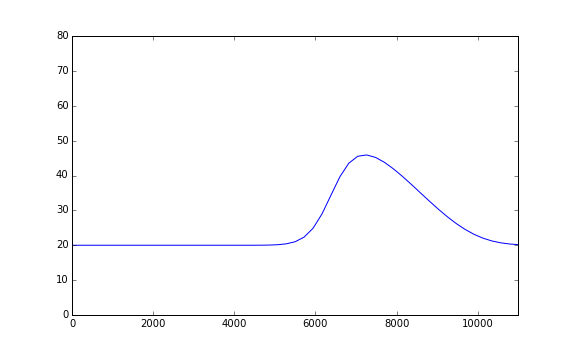
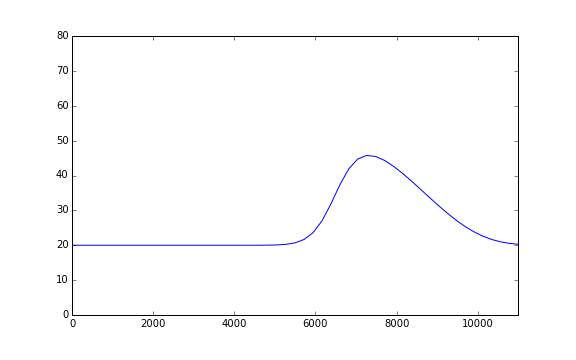
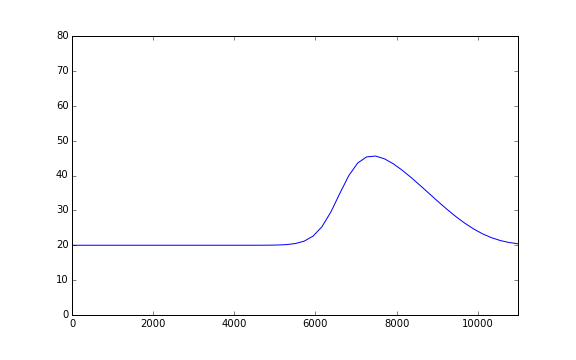
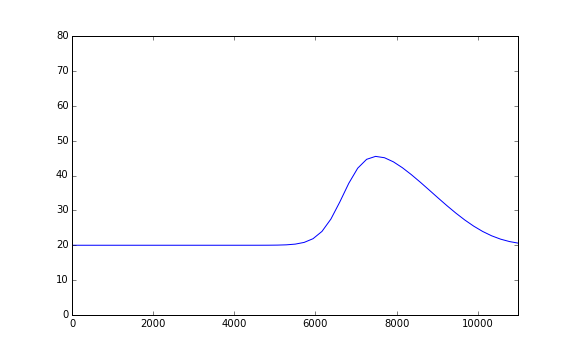
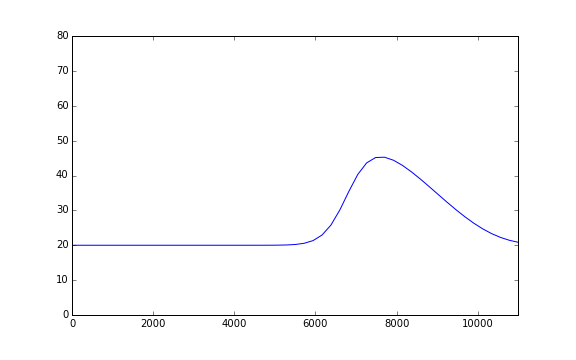
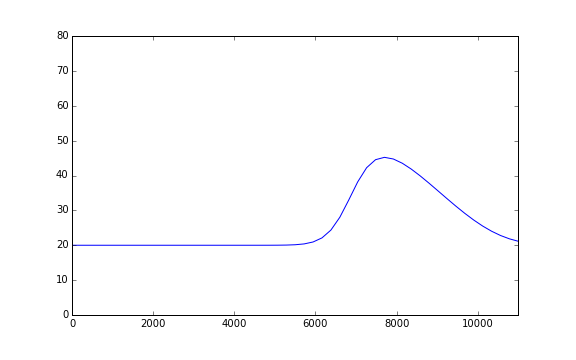

In [9]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(xlim=(0,11000), ylim=(0,80))
line = ax.plot([], [])[0]

anim.FuncAnimation(fig, lambda i: set_plot(i, line, x, rho),
                        frames=nt, interval=80)

## Conclusion

##### Source

(1) We used the following lectures https://github.com/numerical-mooc/numerical-mooc available under Creative Commons Attribution license CC-BY 4.0, (c)2014 L.A. Barba, C. Cooper, G.F. Forsyth, A. Krishnan.

---
###### The cell below loads the style of this notebook. 

In [37]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())